In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

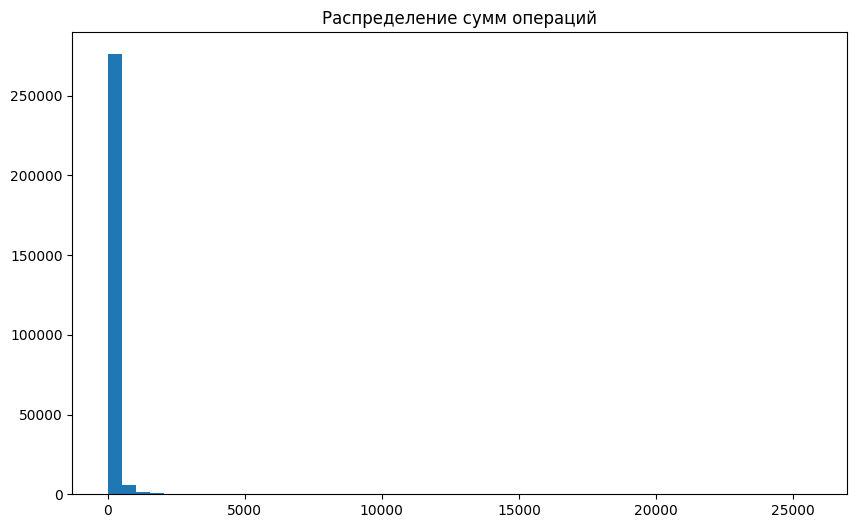

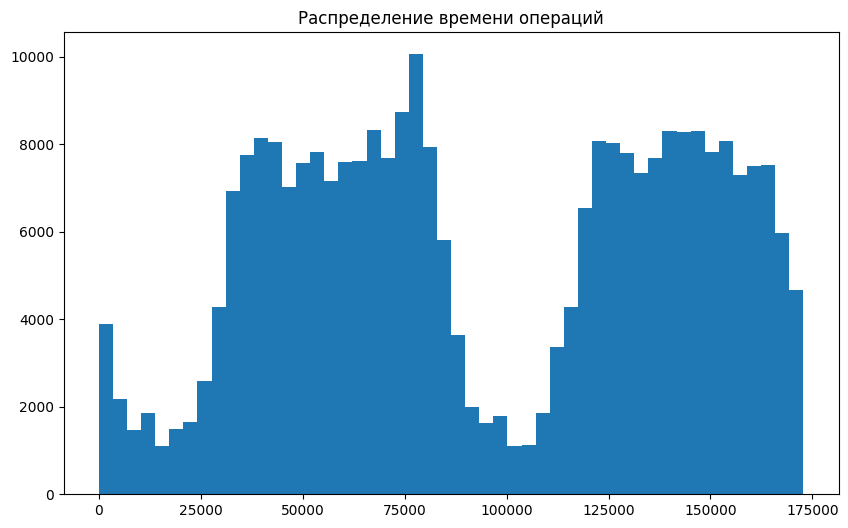

In [ ]:
df = pd.read_csv('drive/MyDrive/OOD_LAB5_DATA/creditcard.csv')
print(df.info())
print(df.describe())
print(df['Class'].value_counts())
fraud_percentage = (df['Class'].value_counts()[1] / len(df)) * 100
print(f"Процент мошеннических операций: {fraud_percentage:.2f}%")
plt.figure(figsize=(10, 6))
plt.hist(df['Amount'], bins=50)
plt.title('Распределение сумм операций')
plt.show()
plt.figure(figsize=(10, 6))
plt.hist(df['Time'], bins=50)
plt.title('Распределение времени операций')
plt.show()
df['Hour'] = df['Time'] // 3600
df_new = df.drop(columns='Time')

In [ ]:
X_full = df_new.drop('Class', axis=1)
y_full = df_new['Class']
scaler = StandardScaler()
X_full_scaled = scaler.fit_transform(X_full)

In [ ]:
RANDOM_STATE = 42
fraud = df_new[df_new["Class"] == 1]
normal = df_new[df_new["Class"] == 0].sample(1000, random_state=RANDOM_STATE)
data = pd.concat([fraud, normal]).sample(frac=1, random_state=RANDOM_STATE)
X = data.drop("Class", axis=1)
y_true = data["Class"]
X_scaled = scaler.fit_transform(X)

In [ ]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_scaled, y_true)
lr_pred = lr.predict(X_scaled)
print("Логистическая регрессия:")
print(classification_report(y_true, lr_pred))
print(confusion_matrix(y_true, lr_pred))
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=200)
mlp.fit(X_scaled, y_true)
mlp_pred = mlp.predict(X_scaled)
print("MLPClassifier:")
print(classification_report(y_true, mlp_pred))
print(confusion_matrix(y_true, mlp_pred))

Логистическая регрессия:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1000
           1       0.98      0.90      0.94       492

    accuracy                           0.96      1492
   macro avg       0.97      0.95      0.96      1492
weighted avg       0.96      0.96      0.96      1492

[[992   8]
 [ 47 445]]
MLPClassifier:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1000
           1       1.00      0.98      0.99       492

    accuracy                           0.99      1492
   macro avg       0.99      0.99      0.99      1492
weighted avg       0.99      0.99      0.99      1492

[[999   1]
 [ 12 480]]


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


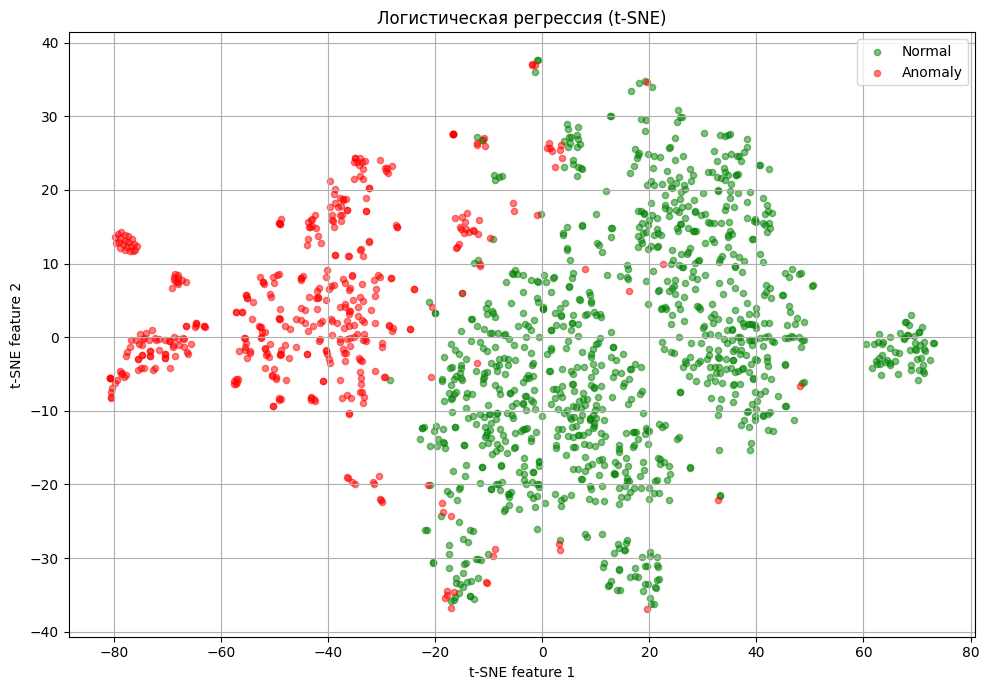

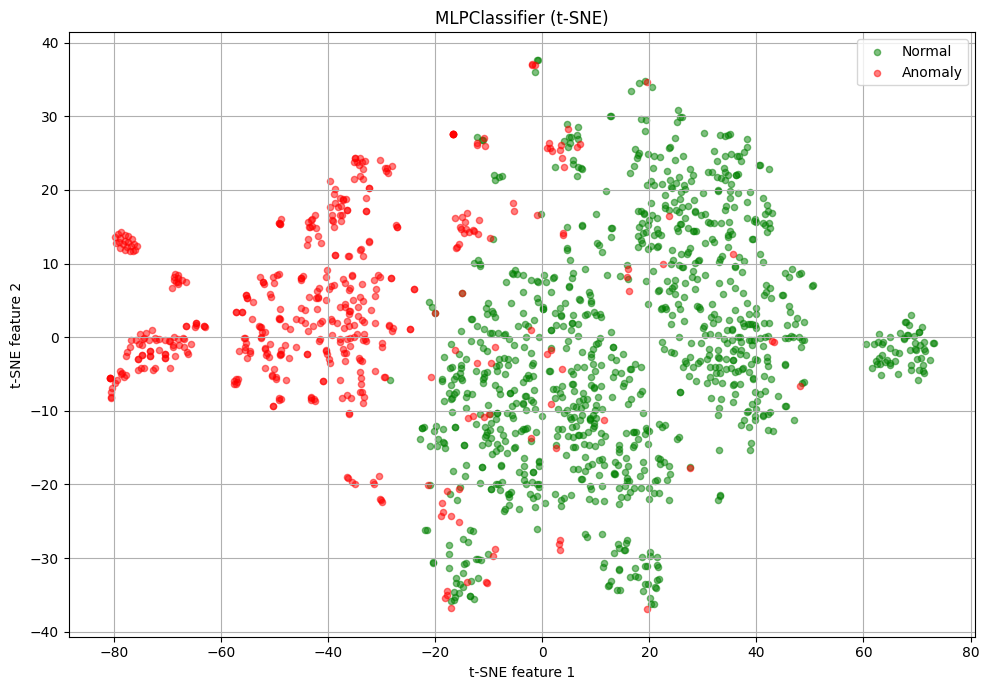

In [ ]:
def plot_tsne(X, y, title):
    X_tsne = TSNE(n_components=2, random_state=42).fit_transform(X)
    plt.figure(figsize=(10, 7))
    plt.scatter(X_tsne[y == 0, 0], X_tsne[y == 0, 1], label="Normal", alpha=0.5, s=20, c='green')
    plt.scatter(X_tsne[y == 1, 0], X_tsne[y == 1, 1], label="Anomaly", alpha=0.5, s=20, c='red')
    plt.xlabel("t-SNE feature 1")
    plt.ylabel("t-SNE feature 2")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
plot_tsne(X_scaled, lr_pred, "Логистическая регрессия (t-SNE)")
plot_tsne(X_scaled, mlp_pred, "MLPClassifier (t-SNE)")

In [ ]:
lof = LocalOutlierFactor(n_neighbors=5, contamination=0.33)
y_pred_lof = lof.fit_predict(X_scaled)
y_pred_lof = np.where(y_pred_lof == -1, 1, 0)
iforest = IsolationForest(contamination=0.33, random_state=RANDOM_STATE)
y_pred_if = iforest.fit_predict(X_scaled)
y_pred_if = np.where(y_pred_if == -1, 1, 0)

Local Outlier Factor
[[652 348]
 [347 145]]
Precision: 0.294
Recall:    0.295
F1-score:  0.294
Isolation Forest
[[875 125]
 [124 368]]
Precision: 0.746
Recall:    0.748
F1-score:  0.747


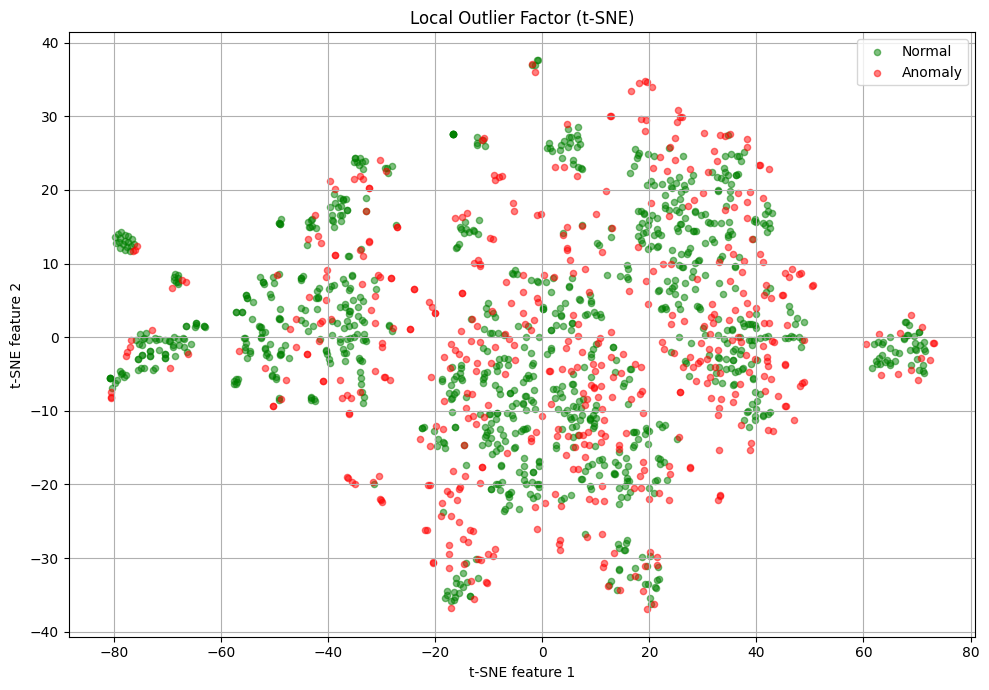

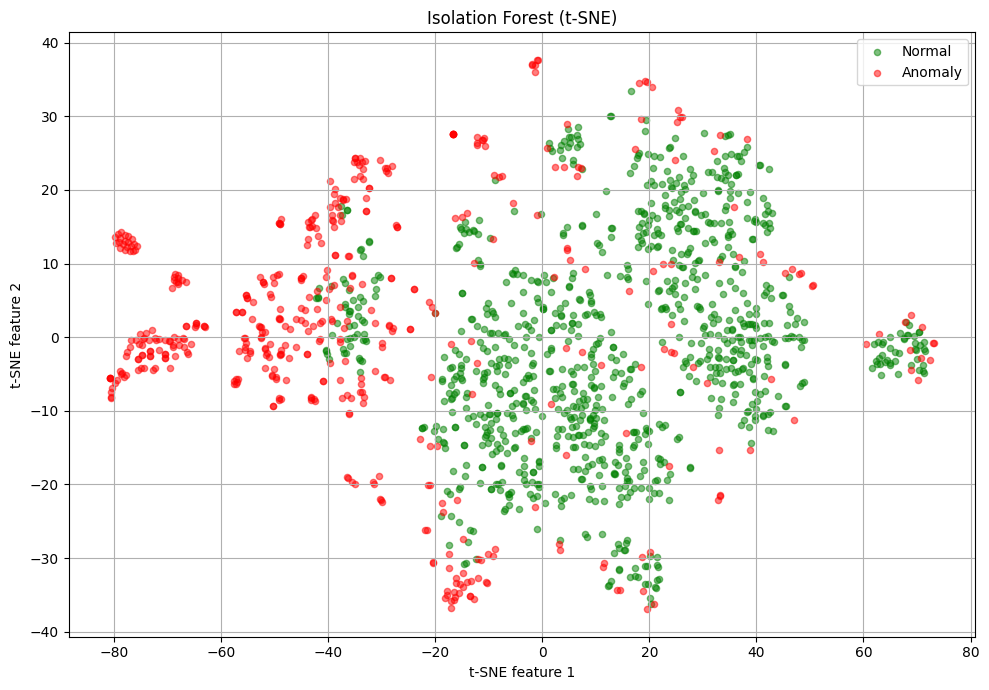

In [ ]:
print("Local Outlier Factor")
print(confusion_matrix(y_true, y_pred_lof))
precision = precision_score(y_true, y_pred_lof)
recall = recall_score(y_true, y_pred_lof)
f1 = f1_score(y_true, y_pred_lof)
print(f"Precision: {precision:.3f}")
print(f"Recall:    {recall:.3f}")
print(f"F1-score:  {f1:.3f}")
print("Isolation Forest")
print(confusion_matrix(y_true, y_pred_if))
precision = precision_score(y_true, y_pred_if)
recall = recall_score(y_true, y_pred_if)
f1 = f1_score(y_true, y_pred_if)
print(f"Precision: {precision:.3f}")
print(f"Recall:    {recall:.3f}")
print(f"F1-score:  {f1:.3f}")
plot_tsne(X_scaled, y_pred_lof, "Local Outlier Factor (t-SNE)")
plot_tsne(X_scaled, y_pred_if, "Isolation Forest (t-SNE)")

In [ ]:
X_train_normal = X_scaled[y_true == 0]
input_dim = X_train_normal.shape[1]
encoding_dim = 8
input_layer = Input(shape=(input_dim,))
encoded = Dense(32, activation='relu')(input_layer)
encoded = Dense(16, activation='relu')(encoded)
encoded = Dense(encoding_dim, activation='relu')(encoded)
decoded = Dense(16, activation='relu')(encoded)
decoded = Dense(32, activation='relu')(decoded)
decoded = Dense(input_dim, activation='linear')(decoded)
autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(X_train_normal, X_train_normal, epochs=70, batch_size=256, shuffle=True, validation_split=0.2)

Epoch 1/70
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - loss: 0.4690 - val_loss: 0.4355
Epoch 2/70
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.4703 - val_loss: 0.4271
Epoch 3/70
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.4491 - val_loss: 0.4204
Epoch 4/70
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.4507 - val_loss: 0.4143
Epoch 5/70
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.4445 - val_loss: 0.4080
Epoch 6/70
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.4238 - val_loss: 0.4013
Epoch 7/70
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.4267 - val_loss: 0.3941
Epoch 8/70
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.4061 - val_loss: 0.3860
Epoch 9/70
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.4110 - val_loss: 0.3773
Epoch 10/70
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.3991 - val_loss: 0.3687
Epoch 11/70
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3894 - val_loss: 0.3604
Epoch 12/70
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.3817 - val_loss: 0.3528
E

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


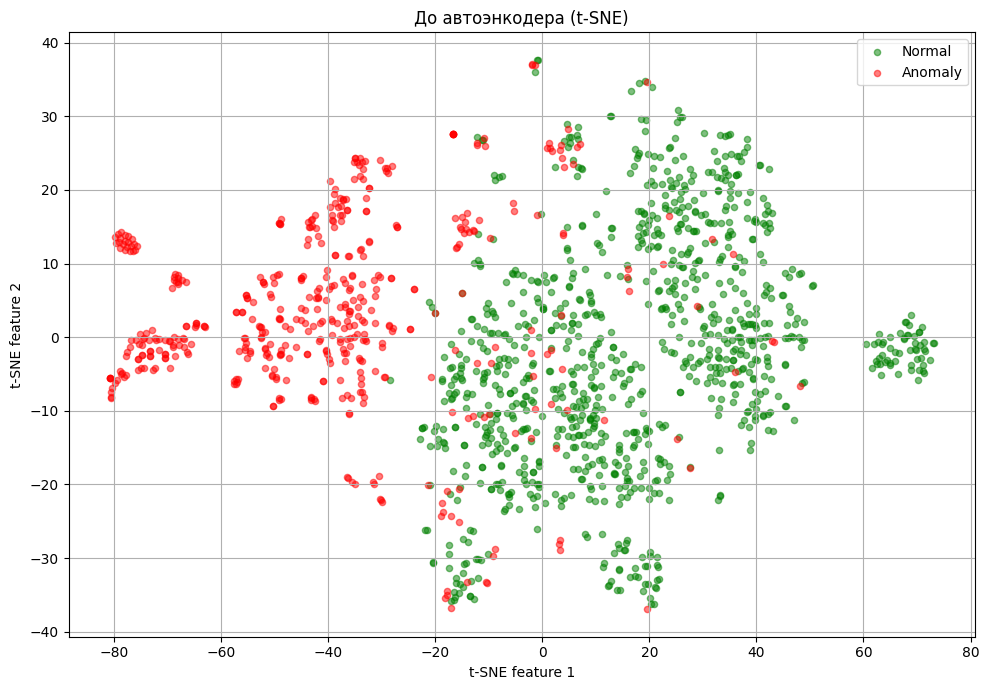

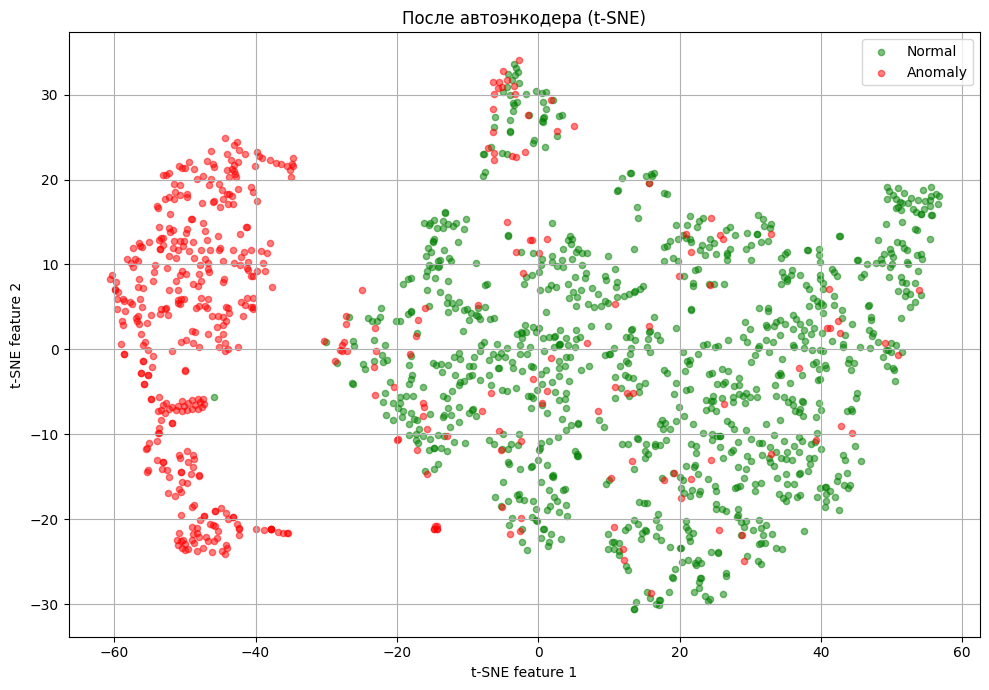


=== Logistic Regression на представлениях автоэнкодера ===
Confusion Matrix:
[[280  12]
 [ 32 124]]
              precision    recall  f1-score   support

      Normal       0.90      0.96      0.93       292
     Anomaly       0.91      0.79      0.85       156

    accuracy                           0.90       448
   macro avg       0.90      0.88      0.89       448
weighted avg       0.90      0.90      0.90       448

Precision: 0.912
Recall:    0.795
F1-score:  0.849


In [ ]:
encoder = Model(inputs=input_layer, outputs=encoded)
X_encoded = encoder.predict(X_scaled)
plot_tsne(X_scaled, y_true.to_numpy(), "До автоэнкодера (t-SNE)")
plot_tsne(X_encoded, y_true.to_numpy(), "После автоэнкодера (t-SNE)")
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_true, test_size=0.3, random_state=RANDOM_STATE)
clf = LogisticRegression(max_iter=500, random_state=RANDOM_STATE)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("\n=== Logistic Regression на представлениях автоэнкодера ===")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=["Normal", "Anomaly"]))
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Precision: {precision:.3f}")
print(f"Recall:    {recall:.3f}")
print(f"F1-score:  {f1:.3f}")